# Perform ‘Exploratory Data Analysis’ on the provided Dataset

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
#Read the data from given CSV file
Data = pd.read_csv("SampleSuperstore.csv")
Data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#To see number of rows and columns present in data
Data.shape

(9994, 13)

Here we have 9,994 rows and 13 columns present in csv file

In [4]:
#To check the datatypes of each column
Data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

# Data Cleaning

Now lets see if there is any null value in each column

In [5]:
Data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

We find there is no such null values in any column

In [6]:
#Count Unique value in all dataset columns
Data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Now lets investigate for any invalid values present in each column

The columns which has integer values are Postal Code, Sales, Quantity, Discount, Profit

In [7]:
Postal_Code = Data[(Data['Postal Code']<0)]
Sales = Data[(Data['Sales']<0)]
Quantity = Data[(Data['Quantity']<0)]
Discount = Data[(Data['Discount']<0)]
Profit = Data[(Data['Profit']<0)]
print('Number of negative values in Postal_Code column :',len(Postal_Code))
print('Number of negative values in Sales column :',len(Sales))
print('Number of negative values in Quantity column :',len(Quantity))
print('Number of negative values in Discount column :',len(Discount))
print('Number of negative values in Profit column :',len(Profit))

Number of negative values in Postal_Code column : 0
Number of negative values in Sales column : 0
Number of negative values in Quantity column : 0
Number of negative values in Discount column : 0
Number of negative values in Profit column : 1871


Lets remove the duplicates

In [8]:
Data.drop_duplicates(subset=None, keep='first', inplace=True)

Give a brief statistics of Data

In [9]:
Data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


## Get the feature wise revenue

In [12]:
ShipMode_Revenue = Data.groupby(Data['Ship Mode'])['Profit'].sum().sort_values()
Segment_Revenue = Data.groupby(Data['Segment'])['Profit'].sum().sort_values()
City_Revenue = Data.groupby(Data['City'])['Profit'].sum().sort_values()
State_Revenue = Data.groupby(Data['State'])['Profit'].sum().sort_values()
Region_Revenue = Data.groupby(Data['Region'])['Profit'].sum().sort_values()
Category_Revenue = Data.groupby(Data['Category'])['Profit'].sum().sort_values()
Sub_Category_Revenue = Data.groupby(Data['Sub-Category'])['Profit'].sum().sort_values()
Discount_Revenue = Data.groupby(Data['Discount'])['Profit'].sum().sort_values()

[Text(0, 0.5, 'Profit'), Text(0.5, 0, 'Discount')]

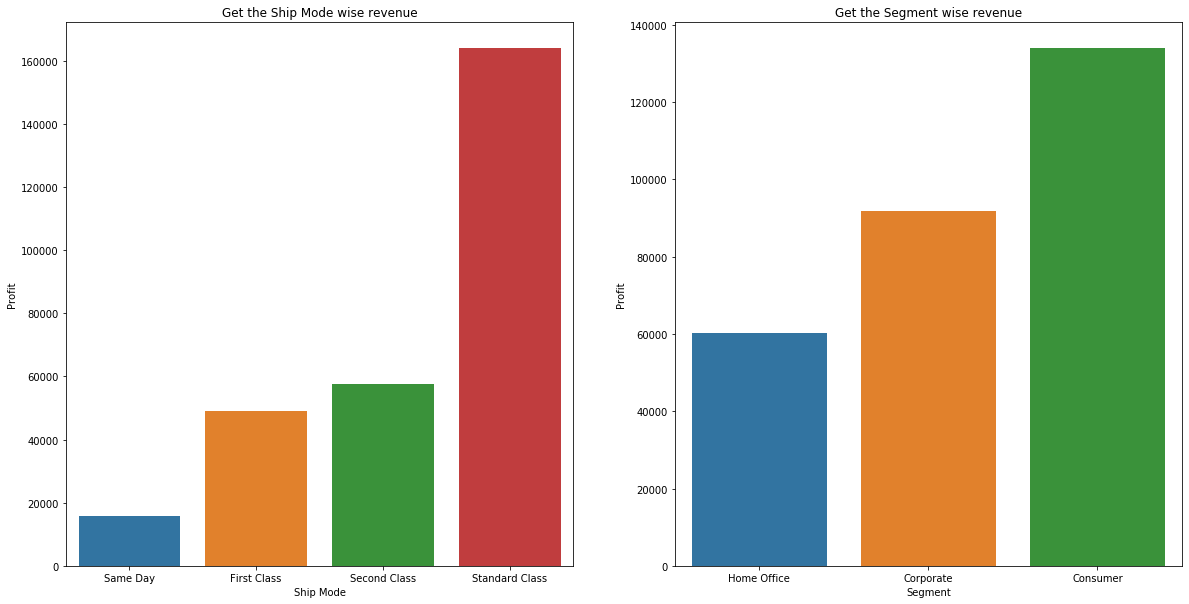

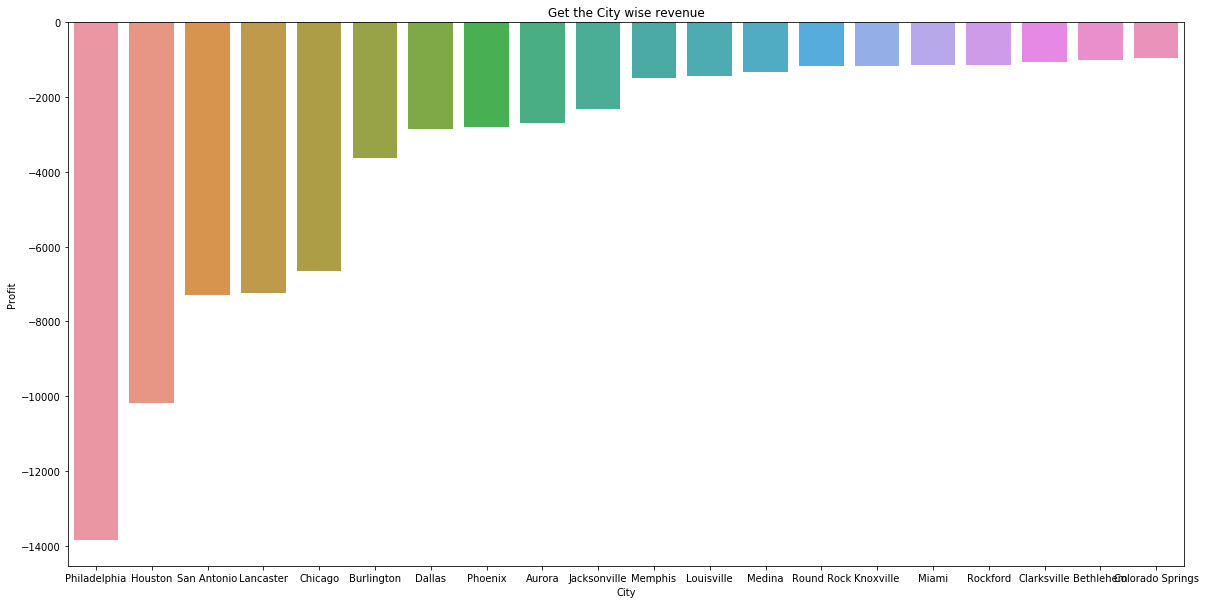

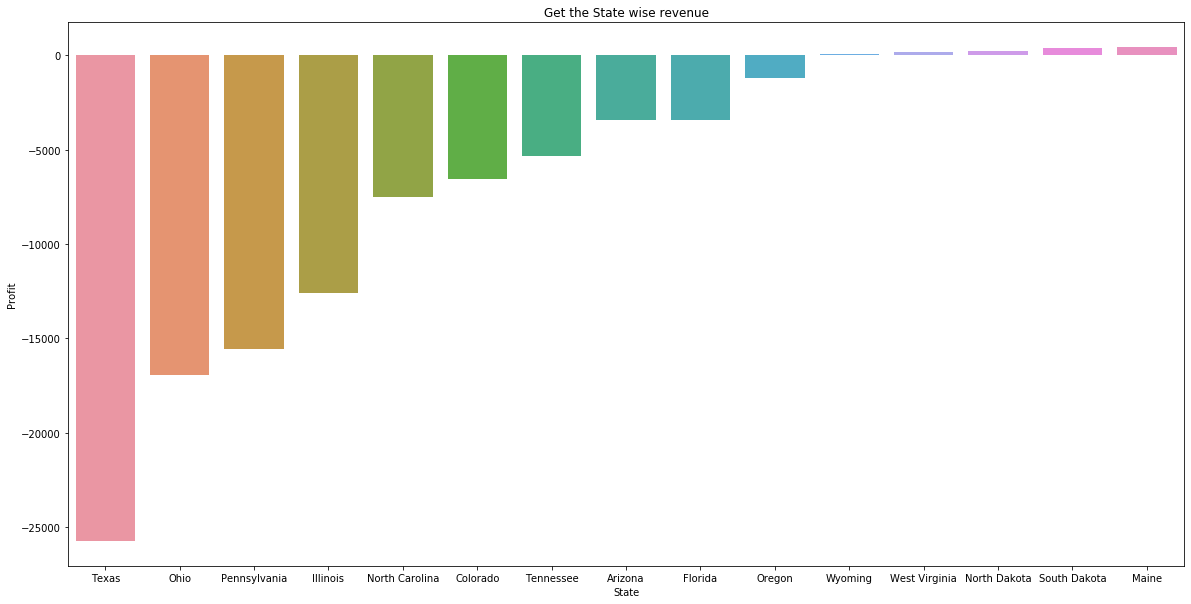

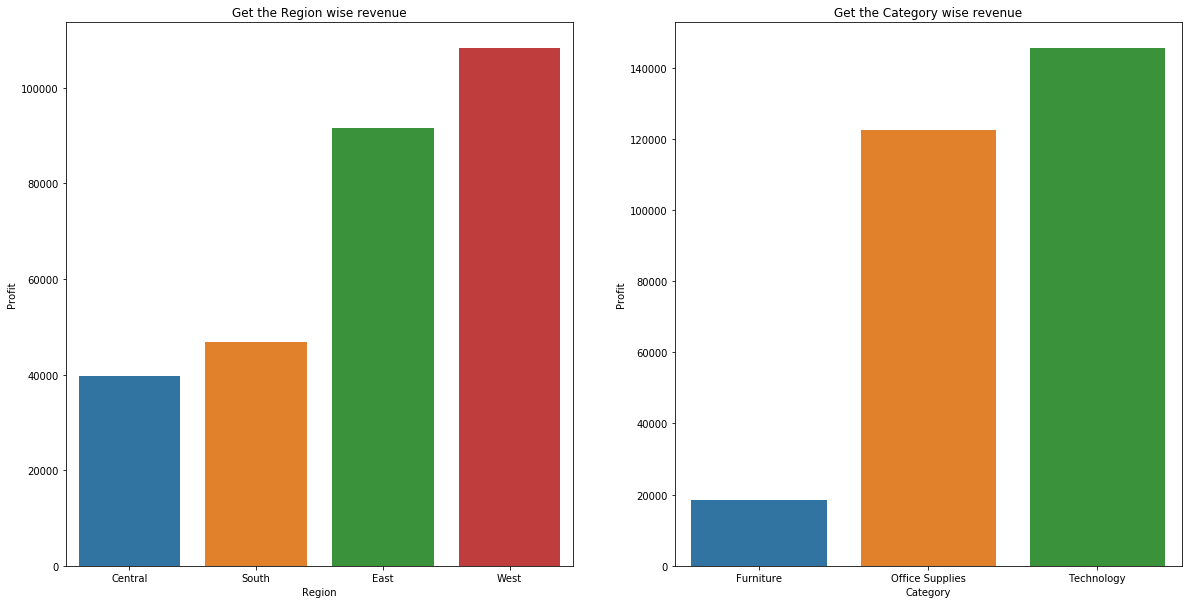

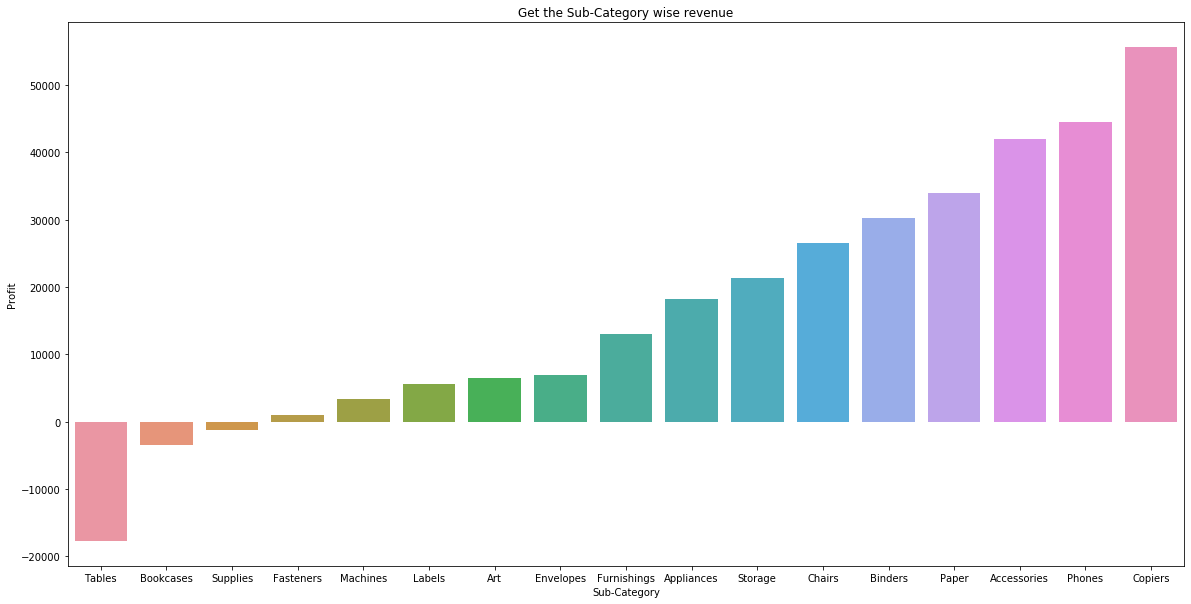

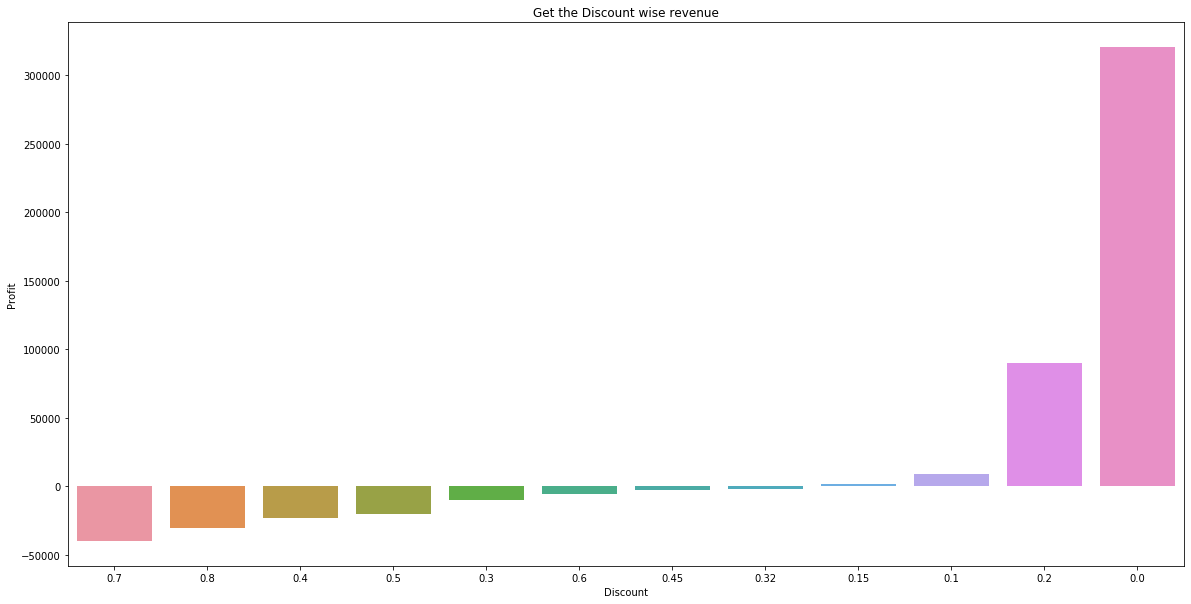

In [11]:
#Plot the graph
fig, axs = plt.subplots(1,2)
sns.barplot(ShipMode_Revenue.index, ShipMode_Revenue.values, order=ShipMode_Revenue.index, ax=axs[0])
axs[0].set_title('Get the Ship Mode wise revenue')
axs[0].set(xlabel='Ship Mode', ylabel='Profit')
sns.barplot(Segment_Revenue.index, Segment_Revenue.values, order=Segment_Revenue.index, ax=axs[1])
axs[1].set_title('Get the Segment wise revenue')
axs[1].set(xlabel='Segment', ylabel='Profit')
fig, axs = plt.subplots(1,1)
sns.barplot(City_Revenue.iloc[0:20].index, City_Revenue.iloc[0:20].values, order=City_Revenue.iloc[0:20].index)
axs.set_title('Get the City wise revenue')
axs.set(xlabel='City', ylabel='Profit')
fig, axs = plt.subplots(1,1)
sns.barplot(State_Revenue.iloc[0:15].index, State_Revenue.iloc[0:15].values, order=State_Revenue.iloc[0:15].index)
axs.set_title('Get the State wise revenue')
axs.set(xlabel='State', ylabel='Profit')
fig, axs = plt.subplots(1,2)
sns.barplot(Region_Revenue.index, Region_Revenue.values, order=Region_Revenue.index, ax=axs[0])
axs[0].set_title('Get the Region wise revenue')
axs[0].set(xlabel='Region', ylabel='Profit')
sns.barplot(Category_Revenue.index, Category_Revenue.values, order=Category_Revenue.index, ax=axs[1])
axs[1].set_title('Get the Category wise revenue')
axs[1].set(xlabel='Category', ylabel='Profit')
fig, axs = plt.subplots(1,1)
sns.barplot(Sub_Category_Revenue.index, Sub_Category_Revenue.values, order=Sub_Category_Revenue.index)
axs.set_title('Get the Sub-Category wise revenue')
axs.set(xlabel='Sub-Category', ylabel='Profit')
fig, axs = plt.subplots(1,1)
sns.barplot(Discount_Revenue.index, Discount_Revenue.values, order=Discount_Revenue.index)
axs.set_title('Get the Discount wise revenue')
axs.set(xlabel='Discount', ylabel='Profit')

From the above graphs we can conclude that :

* We see --> Ship mode on Same day is on loss
* We see --> Segment on Home Office is on loss
* We see --> Cities in Philidelphia, Houston, San and many other cities shows loss
* We see --> States in Texas, Ohio, Pennsylvania and many other states shows loss
* We see --> The Central region is on loss
* We see --> The Furniture Category is on loss
* We see --> The Tables, Bookcases, Supplies sub-Category is on loss
* We see --> More the percentage of discount more the loss

Above are the weak areas where we have to bring on more profits.

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


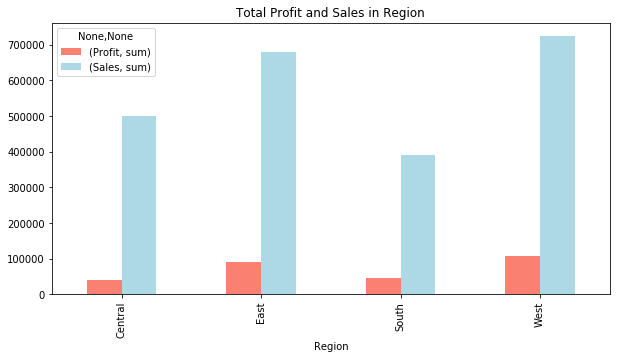

In [12]:
Data.groupby('Region')['Profit','Sales'].agg(['sum']).plot(kind='bar',figsize=(10,5),color=['salmon','lightblue'])
plt.title('Total Profit and Sales in Region')
plt.grid(b=False)
plt.show()

# Central Region

In [13]:
Central = Data.where(Data['Region']=='Central')
Central.dropna(inplace=True)
Central.drop(['Region'],inplace=True,axis=1)
Central[:3]

,Ship Mode,Segment,Country,City,State,Postal Code,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106.0,Office Supplies,Appliances,68.810,5.0,0.8,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106.0,Office Supplies,Binders,2.544,3.0,0.8,-3.8160
16,Standard Class,Consumer,United States,Madison,Wisconsin,53711.0,Office Supplies,Storage,665.880,6.0,0.0,13.3176


# Visualising the Data

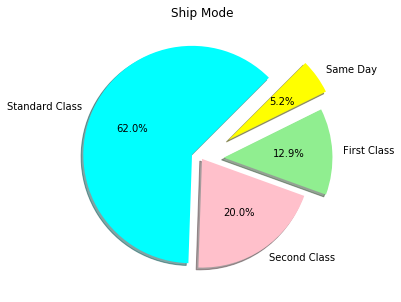

In [14]:
fig, ax = plt.subplots(figsize = (5,5))
explode = (0.1,0.0,0.2,0.3)
colors = ['cyan','pink','lightgreen','yellow']
plt.pie(Central['Ship Mode'].value_counts(),colors=colors,
       labels=Central['Ship Mode'].value_counts().index, startangle=45,
       autopct='%1.1f%%',shadow=True,explode=explode)
plt.title("Ship Mode");

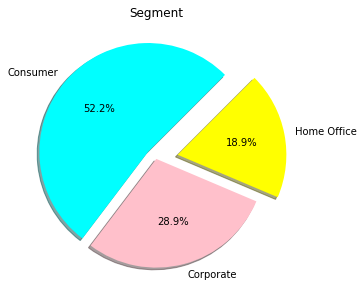

In [15]:
fig, ax = plt.subplots(figsize = (5,5))
explode = (0.1,0.0,0.2)
colors=['cyan','pink','yellow']
plt.title("Segment")
plt.pie(Central['Segment'].value_counts(),autopct = '%1.1f%%',colors=colors,
       labels = Central['Segment'].value_counts().index, startangle=45, shadow=True, explode=explode);


([<matplotlib.patches.Wedge at 0x2220cdee508>,
 [Text(-1.126608293378846, -0.41322361172857025, 'Office Supplies'),
  Text(1.0741000551976003, -0.23729532533219408, 'Furniture'),
  Text(0.700406843704672, 1.0951850315319598, 'Technology')],
 [Text(-0.6571881711376601, -0.24104710684166594, '61.2%'),
  Text(0.5858727573805093, -0.1294338138175604, '20.7%'),
  Text(0.4310195961259519, 0.6739600194042827, '18.1%')])

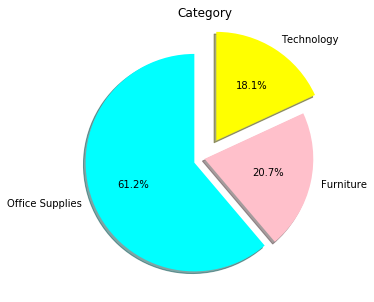

In [16]:
fig, ax = plt.subplots(figsize = (5,5))
plt.title("Category")
explode = (0.1,0.0,0.2)
colors = ['cyan','pink','yellow']
plt.pie(Central['Category'].value_counts(),labels = Central['Category'].value_counts().index,
       startangle=90,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True)

In [17]:
Central['Sub-Category'].unique()

array(['Appliances', 'Binders', 'Storage', 'Art', 'Paper', 'Phones',
       'Furnishings', 'Envelopes', 'Bookcases', 'Chairs', 'Accessories',
       'Labels', 'Tables', 'Machines', 'Fasteners', 'Supplies', 'Copiers'],
      dtype=object)

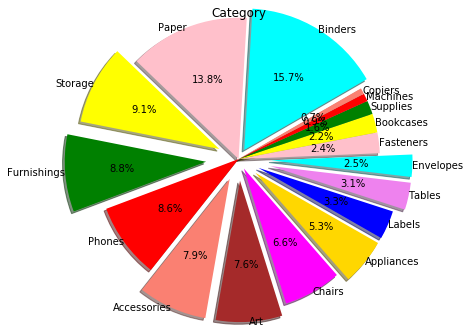

In [18]:
fig, ax = plt.subplots(figsize = (8,5))
plt.title("Category")
explode = (0.1,0.0,0.2,0.3,0,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0,0,0,0,0)
colors = ['cyan','pink','yellow','green','red','salmon','brown','magenta','gold','blue','violet']
plt.pie(Central['Sub-Category'].value_counts(),
        labels=Central['Sub-Category'].value_counts().index,startangle=30,colors=colors,explode=explode,autopct='%1.1f%%',
        radius=1.3,labeldistance=1,shadow=True);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

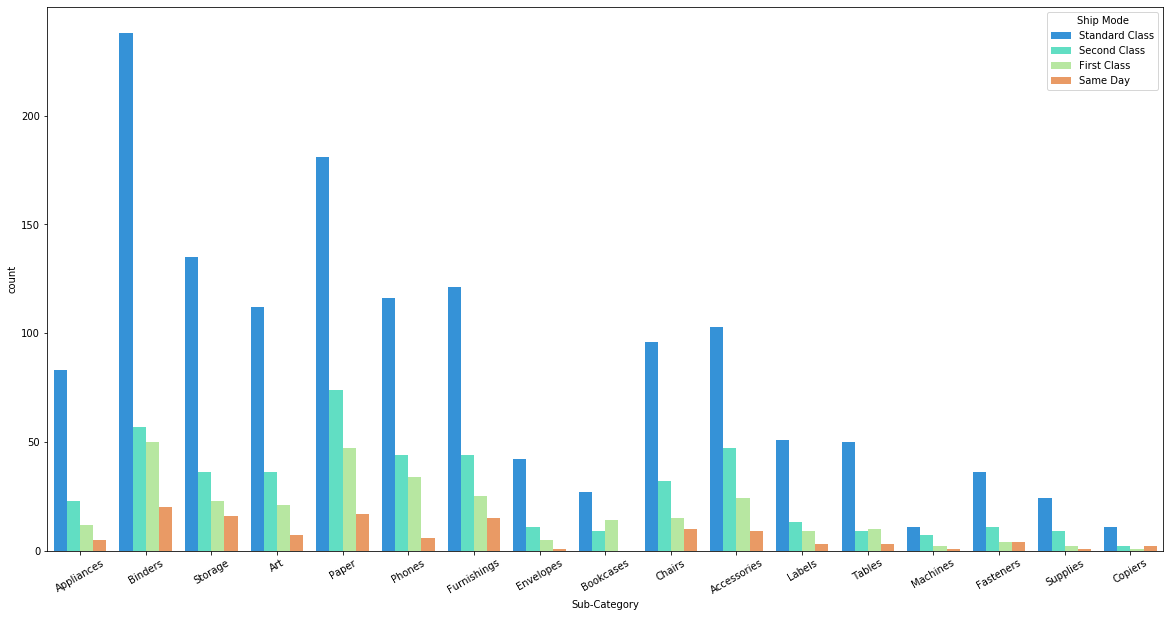

In [19]:
plt.figure()
sns.countplot(x=Central['Sub-Category'],hue=Central['Ship Mode'],palette='rainbow')
plt.xticks(rotation=30)

Comparing Profit data According to each category

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


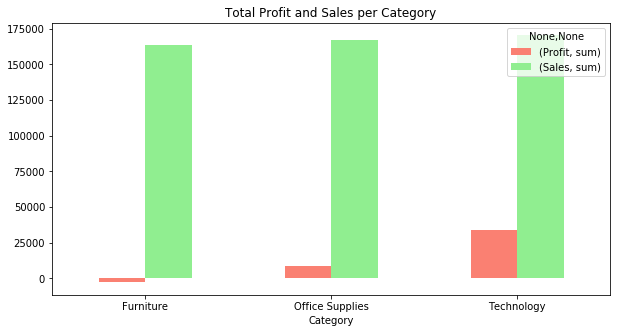

In [20]:
Central.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,5),color=['salmon','lightgreen'])
plt.title('Total Profit and Sales per Category')
plt.xticks(rotation=0)
plt.show()

Inspite of high sale furniture seems to cause ultimate loss for central Region and technology seems to earn the highest profit

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


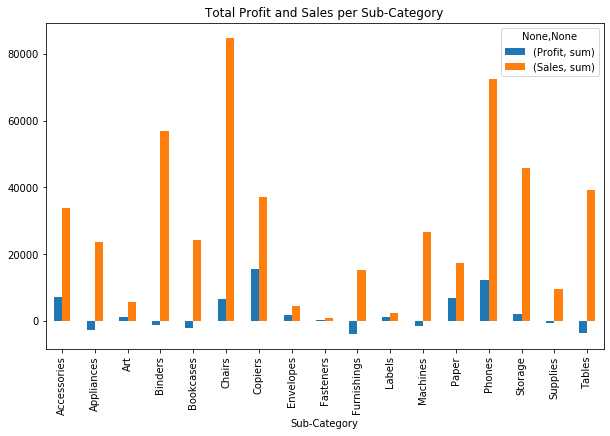

In [21]:
Central.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


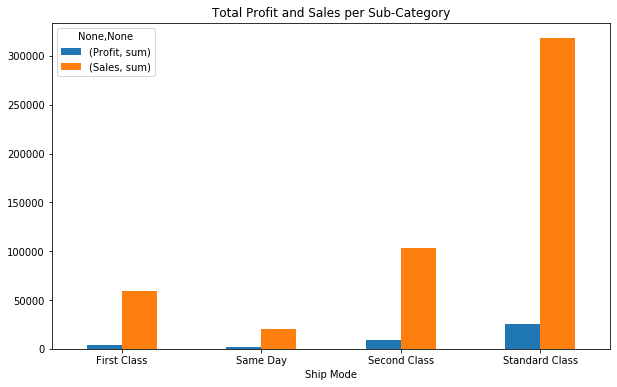

In [22]:
Central.groupby('Ship Mode')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.xticks(rotation=0)
plt.show()

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


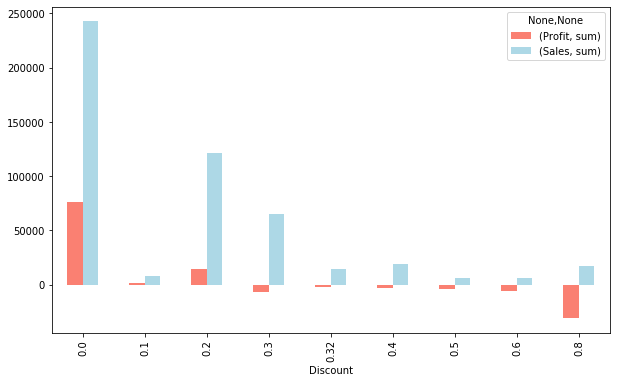

In [23]:
Central.groupby('Discount')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,6),color=['salmon','lightblue'])
plt.show()

Plotting the discounts with sales and profit shows that as the discount percent increases the profit decreases, 80% discount gives the highest loss

Sales of products with less discount is much higher than sales of products with discounts. it means either products in sale dont meet the expectations of the customer

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


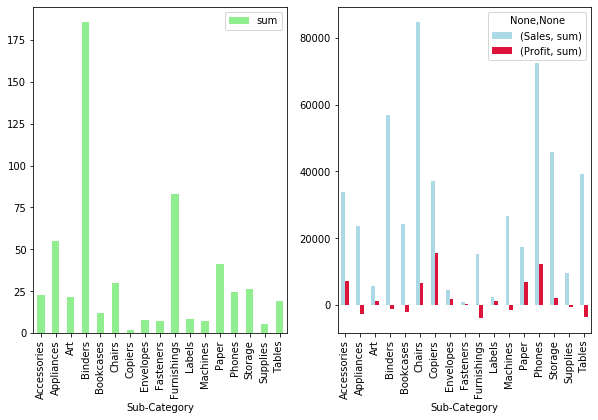

In [24]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
Central.groupby('Sub-Category')['Discount'].agg(['sum']).plot.bar(figsize = (10,6),color=['lightgreen'],ax=axes[0])
Central.groupby('Sub-Category')['Sales','Profit'].agg(['sum']).plot.bar(figsize=(10,6),color=['lightblue','crimson'],ax=axes[1])

Furnishings has a huge discount and high sales but leads to loss, similarly Appliances have discount more than 50% yet results in loss and finally binders having the highest discounted products with relatively high sale still causes loss

In [25]:
Central['City'].nunique()

181

In [26]:
Central['City'].unique()

array(['Fort Worth', 'Madison', 'Fremont', 'Houston', 'Richardson',
       'Naperville', 'Eagan', 'Westland', 'New Albany', 'Chicago',
       'Jackson', 'Rochester', 'Minneapolis', 'Saint Paul', 'Orland Park',
       'Urbandale', 'Bloomington', 'Independence', 'Franklin', 'Edmond',
       'San Antonio', 'Decatur', 'Grand Prairie', 'Dallas', 'Saginaw',
       'Detroit', 'Lakeville', 'Pasadena', 'Taylor', 'Austin',
       'Harlingen', 'Quincy', 'Peoria', 'Canton', 'Columbus', 'Norman',
       'Park Ridge', 'Amarillo', 'Huntsville', 'Gladstone', 'Green Bay',
       'Laredo', 'Dearborn', 'Rochester Hills', 'Aurora', 'Arlington',
       'Tyler', 'Evanston', 'Trenton', 'Cottage Grove', 'Des Moines',
       'Omaha', 'Milwaukee', 'Garland', 'Round Rock', 'Burlington',
       'Jefferson City', 'Saint Peters', 'Rockford', 'Brownsville',
       'Richmond', 'La Porte', 'Lansing', 'Royal Oak', 'Cedar Rapids',
       'Irving', 'Coppell', 'Appleton', 'Allen', 'El Paso', 'Grapevine',
       'Carrollto

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


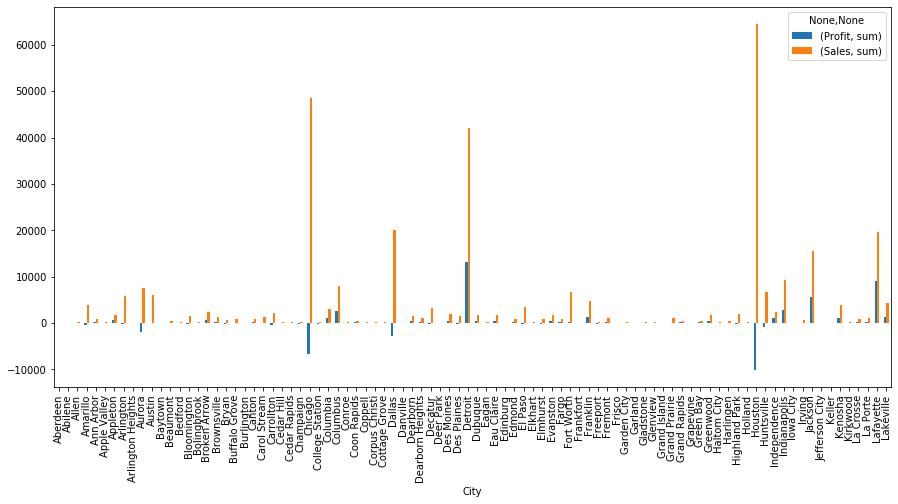

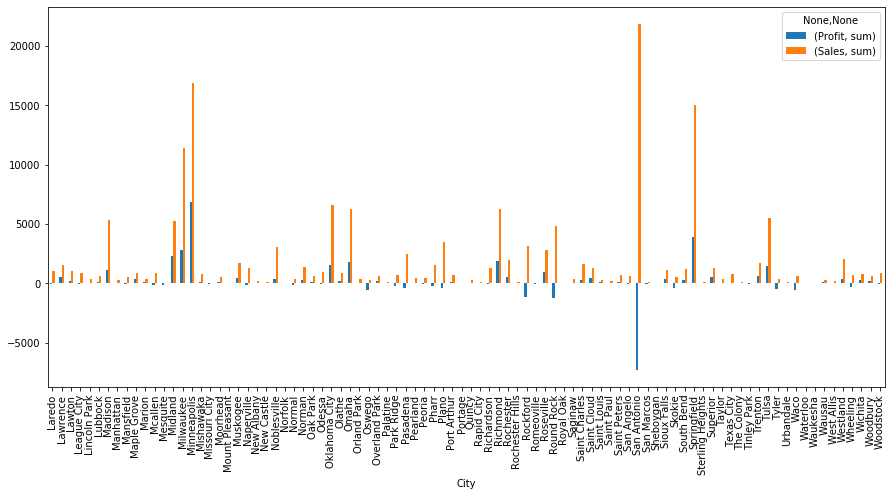

In [27]:
Central.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).head(90).plot.bar(figsize=(15,7)).grid(b=False)
Central.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).tail(90).plot.bar(figsize=(15,7)).grid(b=False)

Inspite high scale cities like houston, San Antonio and Chicago produces big loss for the company.
Whereas Cities like RockFord,Round Rock, Tyler,Waco,Wheeling, Park Ridge, Pasa Dena, Plano, Port Arthur, Oswego, Austin and Dallas produces small loss with less sale in the area

## East Region

In [28]:
east = Data.where(Data['Region']=='East')
east.dropna(inplace=True)
east[:3]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,Furniture,Chairs,71.372,2.0,0.3,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,Furniture,Bookcases,3083.430,7.0,0.5,-1665.0522
28,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,Office Supplies,Binders,9.618,2.0,0.7,-7.0532


In [29]:
Central.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,2319.000000,2319.000000,2319.000000,2319.000000,2319.000000
mean,65339.882708,215.947759,3.780940,0.240250,17.100421
std,11426.698377,633.275800,2.162182,0.265358,291.738112
min,46060.000000,0.444000,1.000000,0.000000,-3701.892800
25%,55125.000000,14.620000,2.000000,0.000000,-5.664300
50%,65203.000000,45.980000,3.000000,0.200000,5.179200
75%,77041.000000,200.012000,5.000000,0.300000,22.456200
max,79907.000000,17499.950000,14.000000,0.800000,8399.976000


Text(0.5, 1.0, 'Ship Mode')

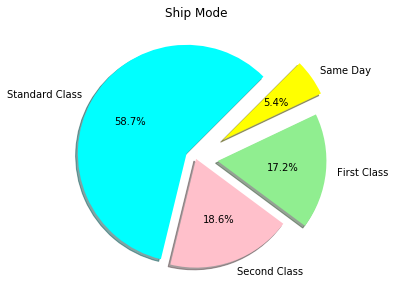

In [30]:
fig, ax = plt.subplots(figsize = (5,5))
explode = (0.1,0.0,0.2,0.3)
colors = ['cyan','pink','lightgreen','yellow']
plt.pie(east['Ship Mode'].value_counts(),colors=colors,labels=Central['Ship Mode'].value_counts().index,startangle=45,autopct='%1.1f%%',shadow=True, explode=explode)
plt.title("Ship Mode")

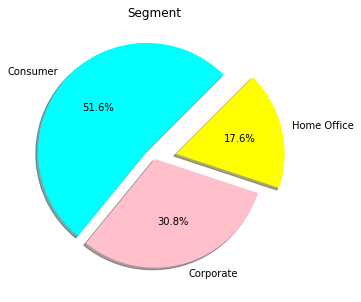

In [31]:
fig, ax = plt.subplots(figsize = (5,5))
explode = (0.1,0.0,0.2)
colors = ['cyan','pink','yellow']
plt.title("Segment")
plt.pie(east['Segment'].value_counts(),autopct='%1.1f%%',colors=colors,labels=Central['Segment'].value_counts().index,startangle=45,shadow=True,explode=explode);

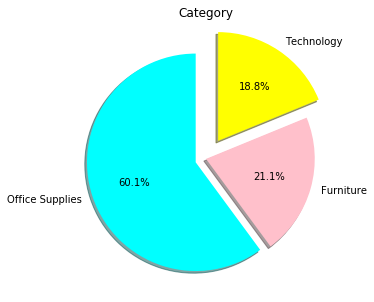

In [36]:
fig, ax = plt.subplots(figsize = (5,5))
plt.title("Category")
explode = (0.1,0.0,0.2)
colors=['cyan','pink','yellow']
plt.pie(east['Category'].value_counts(),labels=Central['Category'].value_counts().index,startangle=90,colors=colors, explode=explode, autopct='%1.1f%%', shadow=True);

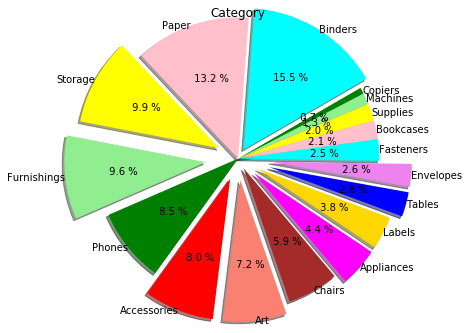

In [41]:
fig, ax = plt.subplots(figsize =(8, 5))
plt.title("Category")
explode = (0.1, 0.0, 0.2,0.3,0,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0,0,0,0,0)
colors=['cyan','pink','yellow','lightgreen', 'green', 'red','salmon','brown','magenta','gold','blue','violet']
plt.pie(east['Sub-Category'].value_counts(),
        labels= Central['Sub-Category'].value_counts().index, 
        startangle=30, colors= colors,
        explode=explode, autopct ='% 1.1f %%',
       radius=1.3, labeldistance=1, shadow=True);

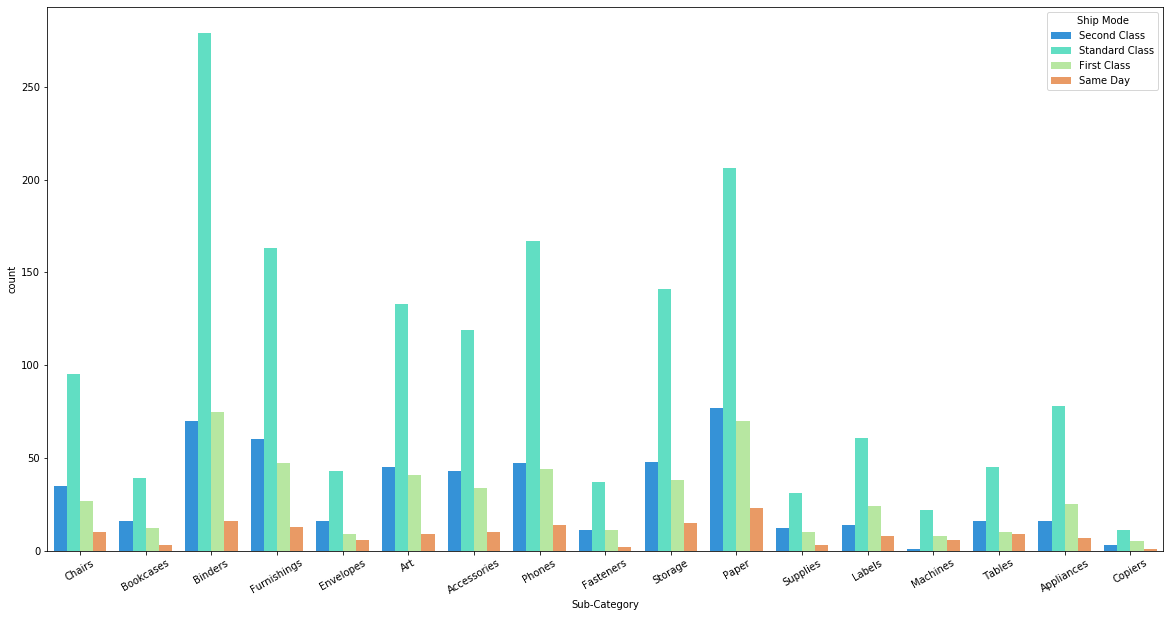

In [42]:
plt.figure()
sns.countplot(x=east['Sub-Category'],hue=east['Ship Mode'],palette='rainbow')
plt.xticks(rotation=30);

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


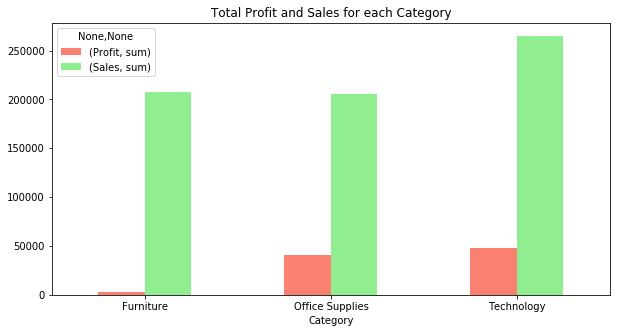

In [43]:
east.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,5),color=['salmon','lightgreen'])
plt.title('Total Profit and Sales for each Category')
plt.xticks(rotation=0)
plt.show()

Profit increases as the Sale increases, the most demanded Category is Technology with highest profit.

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


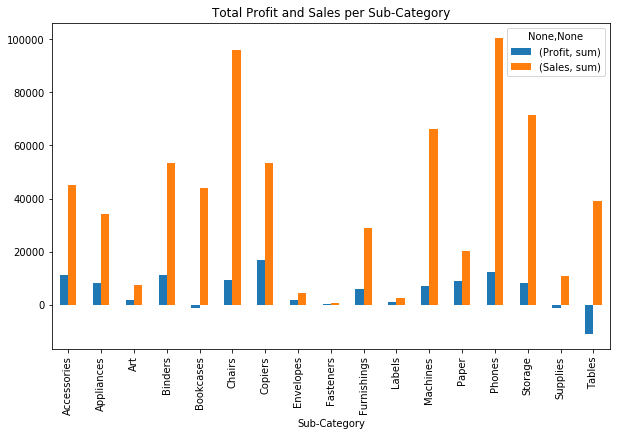

In [44]:
east.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

Mostly all the products results in profit except Tables which produces loss along with bookcases

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


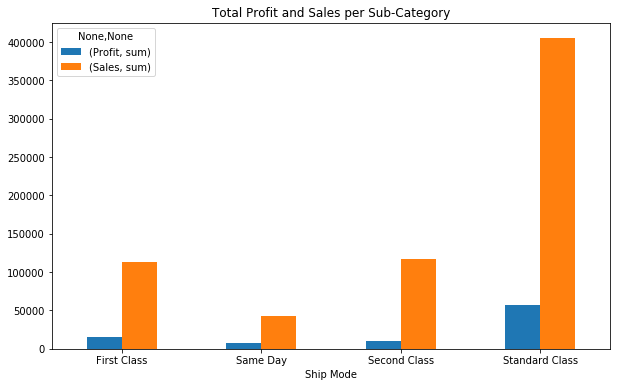

In [45]:
east.groupby('Ship Mode')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.xticks(rotation=0)
plt.show()

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


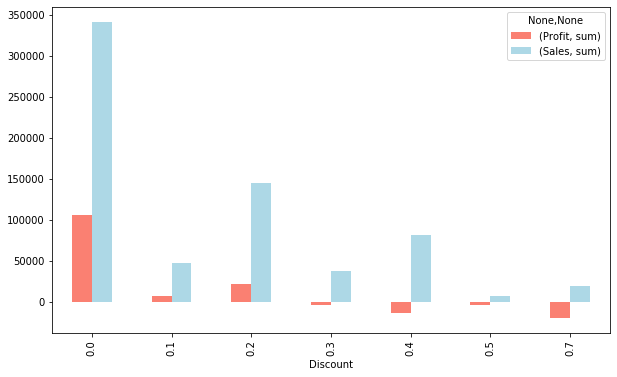

In [46]:
east.groupby('Discount')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6),color=['salmon','lightblue'])
plt.show()

The Profit decreases with the increase in the discount and increase in discount does not affect much of the sale

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


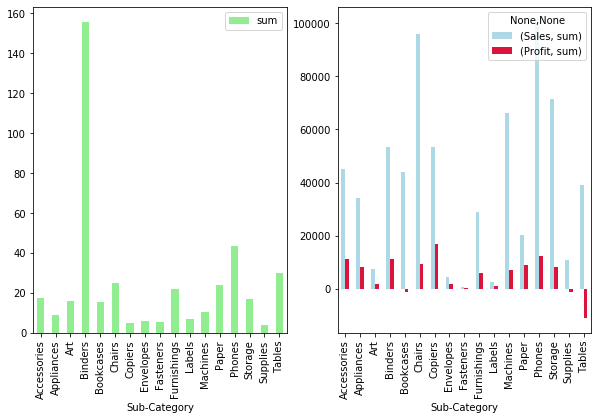

In [47]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

east.groupby('Sub-Category')['Discount'].agg(['sum']).plot.bar(figsize = (10,6),color=['lightgreen'],ax=axes[0])
east.groupby('Sub-Category')['Sales','Profit'].agg(['sum']).plot.bar(figsize = (10,6),color=['lightblue','crimson'],ax=axes[1])

Discount on tables category helps in sale but does not produce any profit ,it further leads to loss
chairs and phones are in high demand irrespective of discount percent and here discount on binders really helps in sale and profit unlike what we saw in the central region
Finally Copiers seems to win the highest profit despite of sale or discount

In [48]:
east['City'].nunique()

108

In [49]:
east['City'].unique()

array(['Philadelphia', 'Dover', 'New York City', 'Troy', 'Columbus',
       'Wilmington', 'Newark', 'Fairfield', 'Hamilton', 'Westfield',
       'Akron', 'Medina', 'Dublin', 'Morristown', 'Cincinnati',
       'Belleville', 'Lakewood', 'Hackensack', 'Lowell', 'Manchester',
       'Franklin', 'Warwick', 'Lawrence', 'New Rochelle', 'Auburn',
       'Lindenhurst', 'Rochester', 'Springfield', 'Grove City',
       'Plainfield', 'Cleveland', 'Chester', 'Mount Vernon', 'Oceanside',
       'Lorain', 'Linden', 'New Brunswick', 'Lancaster', 'Concord',
       'Columbia', 'Norwich', 'Toledo', 'Washington', 'Yonkers',
       'Clinton', 'Cuyahoga Falls', 'Rockville', 'Buffalo', 'Long Beach',
       'Providence', 'Middletown', 'Freeport', 'Parma', 'New Bedford',
       'Vineland', 'Niagara Falls', 'Allentown', 'Bridgeton', 'Everett',
       'Watertown', 'Bayonne', 'Baltimore', 'Meriden', 'Bristol',
       'Reading', 'Paterson', 'Leominster', 'Perth Amboy', 'York',
       'Quincy', 'Kent', 'Marion', 'B

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


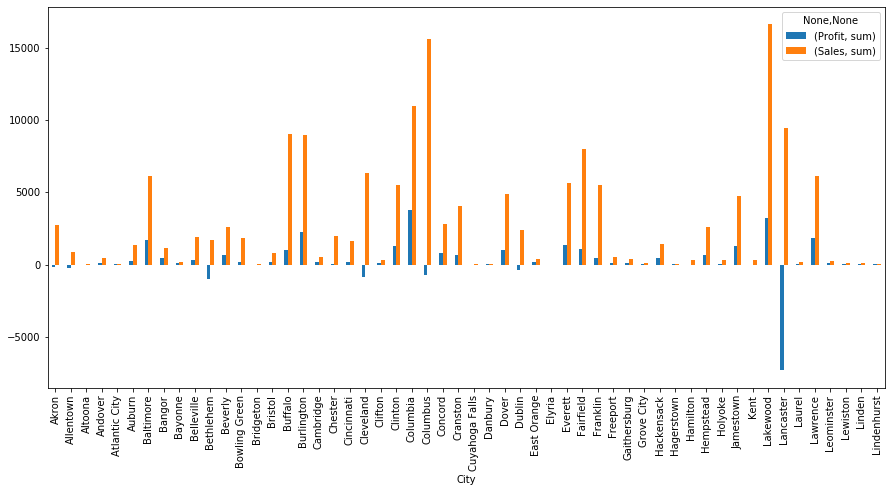

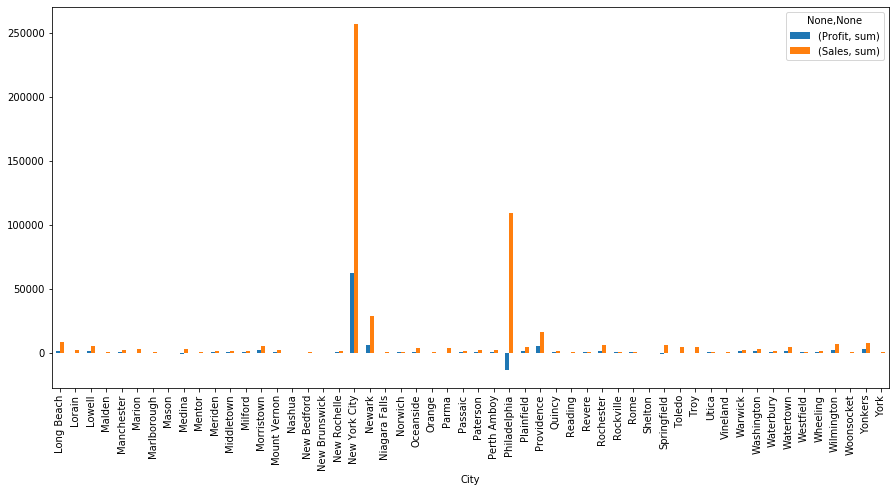

In [50]:
east.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).head(54).plot.bar(figsize=(15,7)).grid(b=False)
east.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).tail(54).plot.bar(figsize=(15,7)).grid(b=False)

Cities like Lancaster, Philedelphia, Columbus, Bethlehem, cleveland , Dublin seems to not do well for the company among which Lancaster happens to be a huge loss
Rest all the cities are doing well including New York and Columbia being the most successful ones

## West Region

In [56]:
west= Data.where(Data['Region']=='West')
west.dropna(inplace=True)
west[:3]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,14.62,2.0,0.0,6.8714
5,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,Furniture,Furnishings,48.86,7.0,0.0,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,Office Supplies,Art,7.28,4.0,0.0,1.9656


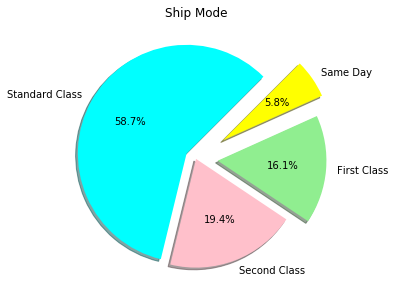

In [58]:
fig, ax = plt.subplots(figsize =(5, 5)) 
explode = (0.1, 0.0, 0.2, 0.3) 
colors=['cyan','pink','lightgreen','yellow']
plt.pie(west['Ship Mode'].value_counts(),colors=colors,
        labels= Central['Ship Mode'].value_counts().index, startangle=45,
        autopct='%1.1f%%',shadow=True, explode=explode)
plt.title("Ship Mode");

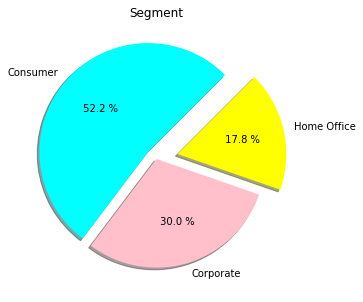

In [59]:
fig, ax = plt.subplots(figsize =(5, 5))
explode = (0.1, 0.0, 0.2)
colors=['cyan','pink','yellow']
plt.title("Segment")
plt.pie(west['Segment'].value_counts(), autopct ='% 1.1f %%',colors=colors,
        labels= Central['Segment'].value_counts().index,
        startangle=45,shadow=True, explode=explode);

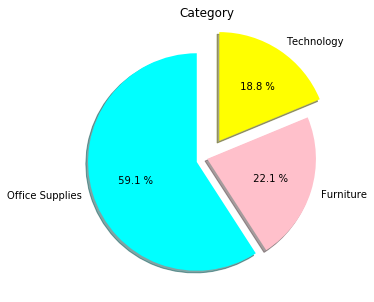

In [61]:
fig, ax = plt.subplots(figsize =(5, 5))
plt.title("Category")
explode = (0.1, 0.0, 0.2)
colors=['cyan','pink','yellow']
plt.pie(west['Category'].value_counts(),labels= Central['Category'].value_counts().index, 
        startangle=90, colors= colors, explode=explode, autopct ='% 1.1f %%',shadow=True);

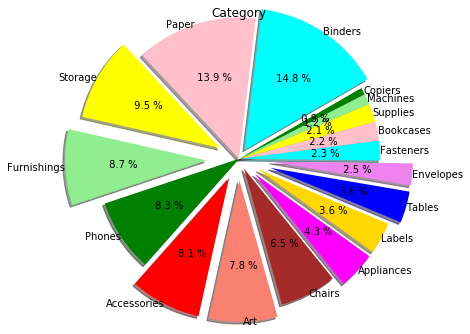

In [62]:
fig, ax = plt.subplots(figsize =(8, 5))
plt.title("Category")
explode = (0.1, 0.0, 0.2,0.3,0,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0,0,0,0,0)
colors=['cyan','pink','yellow','lightgreen', 'green', 'red','salmon','brown','magenta','gold','blue','violet']
plt.pie(west['Sub-Category'].value_counts(),
        labels= Central['Sub-Category'].value_counts().index, 
        startangle=30, colors= colors,
        explode=explode, autopct ='% 1.1f %%',
       radius=1.3, labeldistance=1, shadow=True);

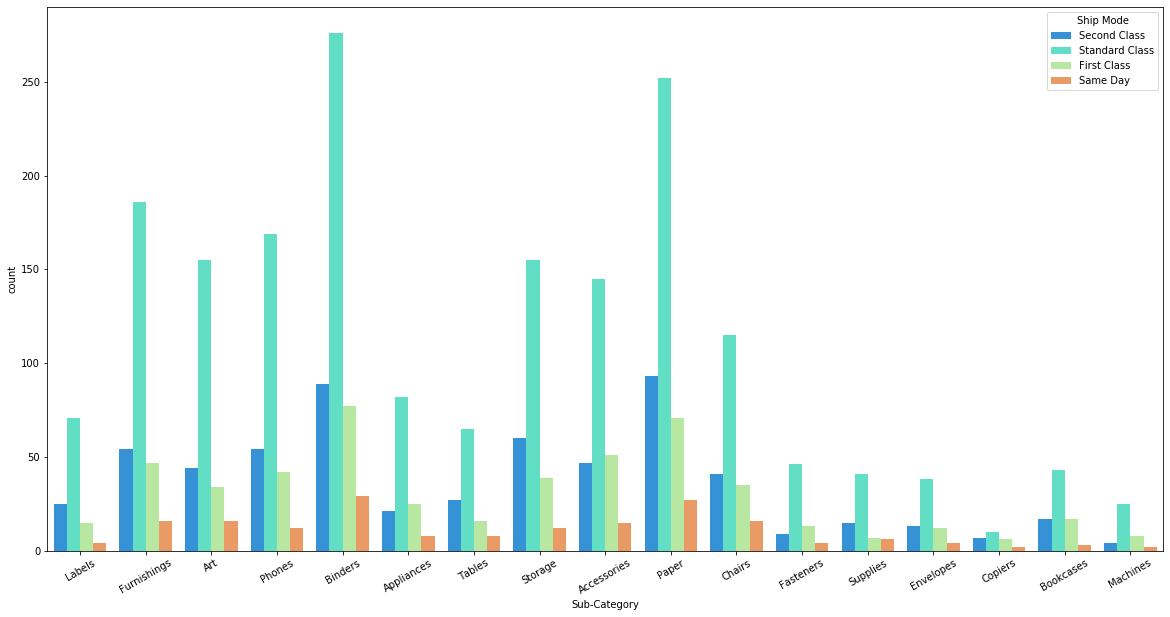

In [63]:
plt.figure()
sns.countplot(x=west['Sub-Category'],hue=west['Ship Mode'],palette='rainbow')
plt.xticks(rotation=30);

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


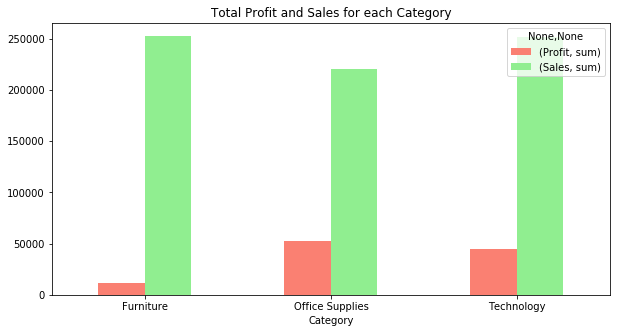

In [64]:
west.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,5),color=['salmon','lightgreen'])
plt.title('Total Profit and Sales for each Category')
plt.xticks(rotation=0)
plt.show()

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


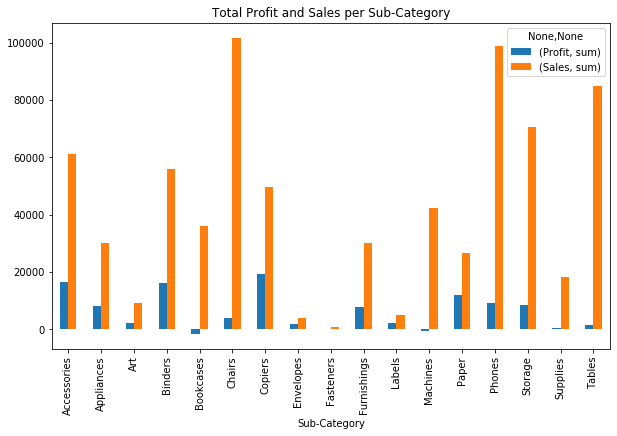

In [65]:
west.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


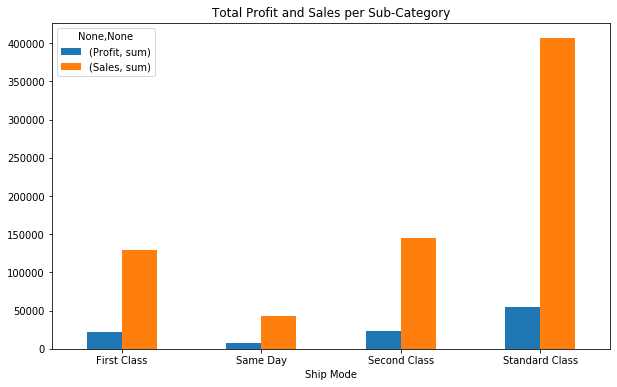

In [66]:
west.groupby('Ship Mode')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.xticks(rotation=0)
plt.show()

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


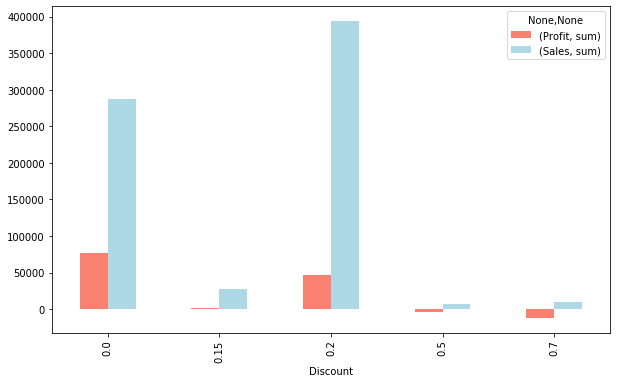

In [67]:
west.groupby('Discount')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6),color=['salmon','lightblue'])
plt.show()

Like Previous Observations here too discounts results in loss

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


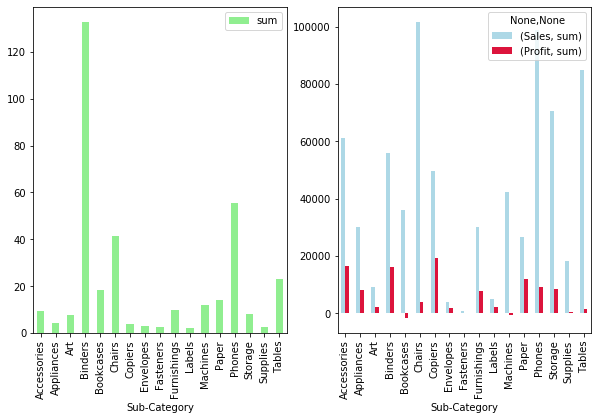

In [68]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

west.groupby('Sub-Category')['Discount'].agg(['sum']).plot.bar(figsize = (10,6),color=['lightgreen'],ax=axes[0])
west.groupby('Sub-Category')['Sales','Profit'].agg(['sum']).plot.bar(figsize = (10,6),color=['lightblue','crimson'],ax=axes[1])

In [69]:
west['City'].nunique()

169

In [70]:
west['City'].unique()

array(['Los Angeles', 'Seattle', 'West Jordan', 'San Francisco', 'Orem',
       'Gilbert', 'Portland', 'Aurora', 'Phoenix', 'Roseville',
       'Pasadena', 'Scottsdale', 'San Jose', 'Carlsbad', 'Redlands',
       'Denver', 'Whittier', 'Santa Clara', 'San Diego', 'Brentwood',
       'Inglewood', 'Colorado Springs', 'Arvada', 'Long Beach',
       'Hesperia', 'Layton', 'Tucson', 'Des Moines', 'Las Vegas',
       'Huntington Beach', 'Louisville', 'Concord', 'Costa Mesa',
       'Parker', 'Great Falls', 'Mesa', 'Anaheim', 'Marysville', 'Salem',
       'Vallejo', 'Mission Viejo', 'Sierra Vista', 'Vancouver',
       'Lancaster', 'Lake Elsinore', 'Edmonds', 'Santa Ana', 'Salinas',
       'Farmington', 'Riverside', 'Torrance', 'Oceanside', 'Murrieta',
       'Olympia', 'Oakland', 'Encinitas', 'Antioch', 'Reno', 'Escondido',
       'Fresno', 'Pueblo', 'Fairfield', 'Pico Rivera', 'Provo',
       'Pleasant Grove', 'Glendale', 'Westminster', 'Pomona',
       'North Las Vegas', 'Tempe', 'Laguna Nigu

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


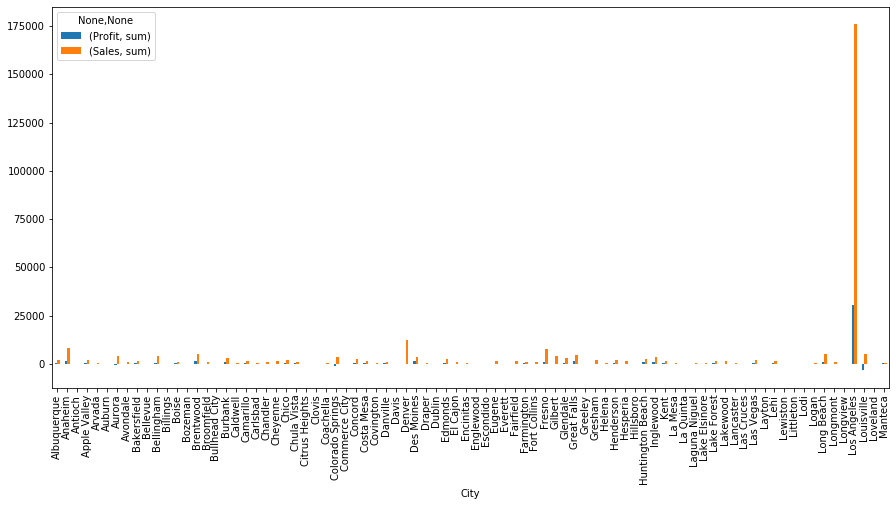

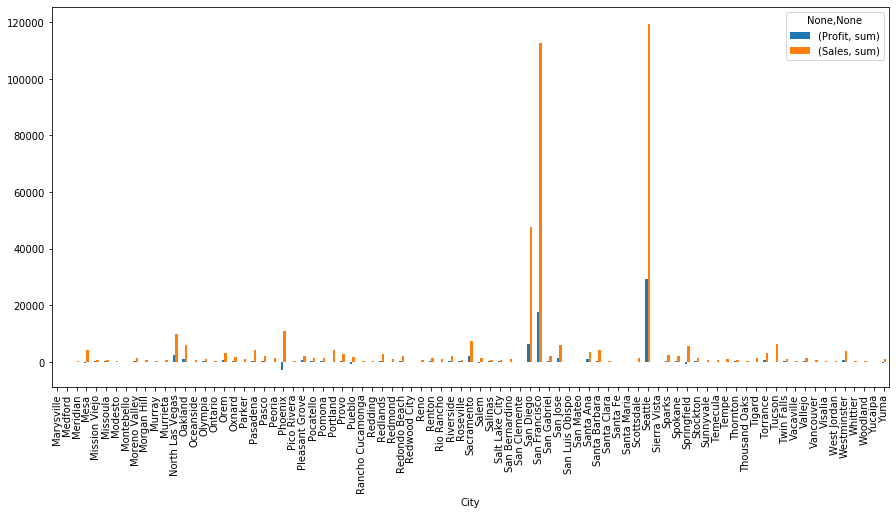

In [71]:
west.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).head(84).plot.bar(figsize=(15,7)).grid(b=False)
west.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).tail(85).plot.bar(figsize=(15,7)).grid(b=False)
#plt.grid(b=False)

Almost all the Cities are doing well except Phoenix and Peublo which produces very minute loss
While San Diego, San Francisco, Seattle and Los Angeles are a big success

## South Region

In [74]:
south=Data.where(Data['Region']=='South')
south.dropna(inplace=True)
south[:3]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,261.9600,2.0,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,731.9400,3.0,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,957.5775,5.0,0.45,-383.0310


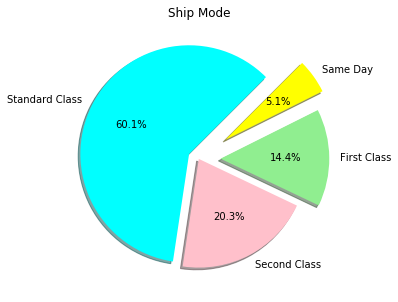

In [76]:
fig, ax = plt.subplots(figsize =(5, 5)) 
explode = (0.1, 0.0, 0.2, 0.3) 
colors=['cyan','pink','lightgreen','yellow']
plt.pie(south['Ship Mode'].value_counts(),colors=colors,
        labels= Central['Ship Mode'].value_counts().index, startangle=45,
        autopct='%1.1f%%',shadow=True, explode=explode)
plt.title("Ship Mode");

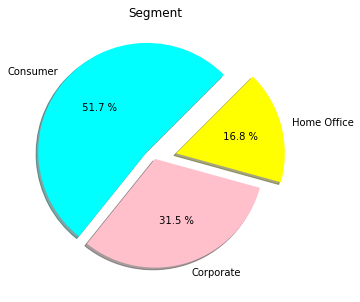

In [77]:
fig, ax = plt.subplots(figsize =(5, 5))
explode = (0.1, 0.0, 0.2)
colors=['cyan','pink','yellow']
plt.title("Segment")
plt.pie(south['Segment'].value_counts(), autopct ='% 1.1f %%',colors=colors,
        labels= Central['Segment'].value_counts().index,
        startangle=45,shadow=True, explode=explode);

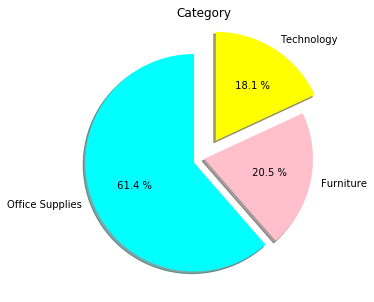

In [79]:
fig, ax = plt.subplots(figsize =(5, 5))
plt.title("Category")
explode = (0.1, 0.0, 0.2)
colors=['cyan','pink','yellow']
plt.pie(south['Category'].value_counts(),labels= Central['Category'].value_counts().index, 
        startangle=90, colors= colors, explode=explode, autopct ='% 1.1f %%',shadow=True);

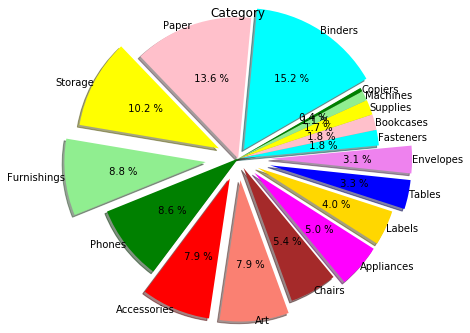

In [80]:
fig, ax = plt.subplots(figsize =(8, 5))
plt.title("Category")
explode = (0.1, 0.0, 0.2,0.3,0,0.2,0.2,0.1,0.2,0.2,0.3,0.3,0,0,0,0,0)
colors=['cyan','pink','yellow','lightgreen', 'green', 'red','salmon','brown','magenta','gold','blue','violet']
plt.pie(south['Sub-Category'].value_counts(),
        labels= Central['Sub-Category'].value_counts().index, 
        startangle=30, colors= colors,
        explode=explode, autopct ='% 1.1f %%',
       radius=1.3, labeldistance=1, shadow=True);

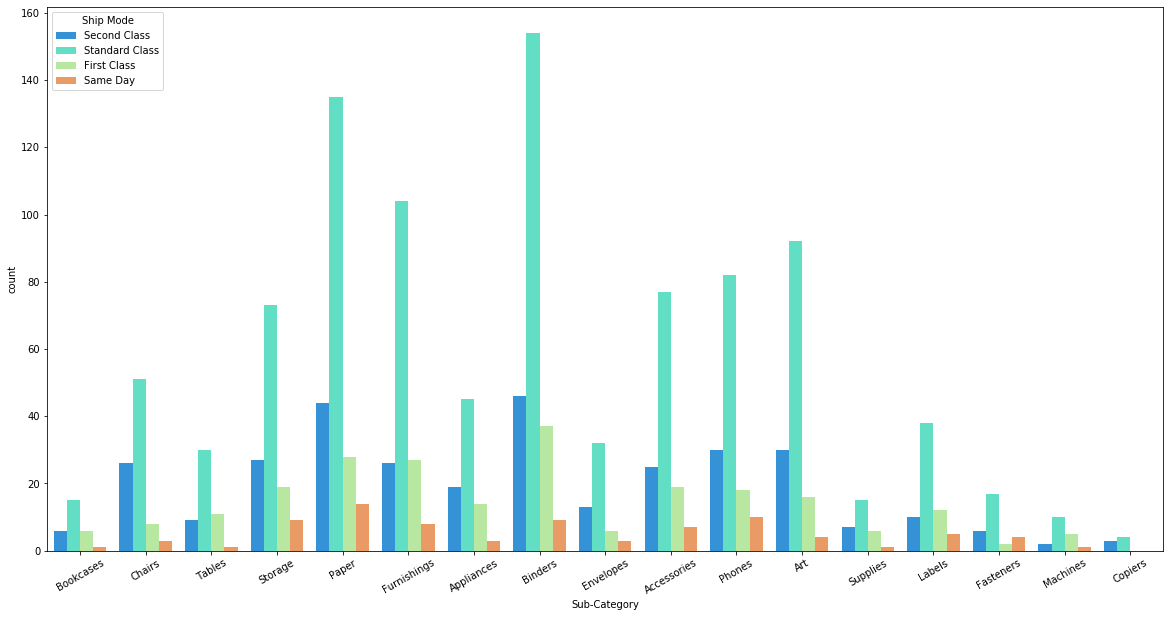

In [81]:
plt.figure()
sns.countplot(x=south['Sub-Category'],hue=south['Ship Mode'],palette='rainbow')
plt.xticks(rotation=30);

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


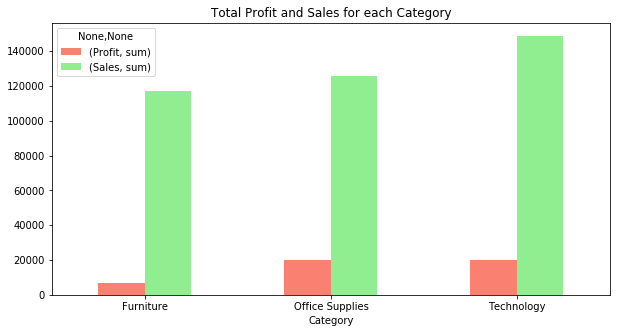

In [82]:
south.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10,5),color=['salmon','lightgreen'])
plt.title('Total Profit and Sales for each Category')
plt.xticks(rotation=0)
plt.show()

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


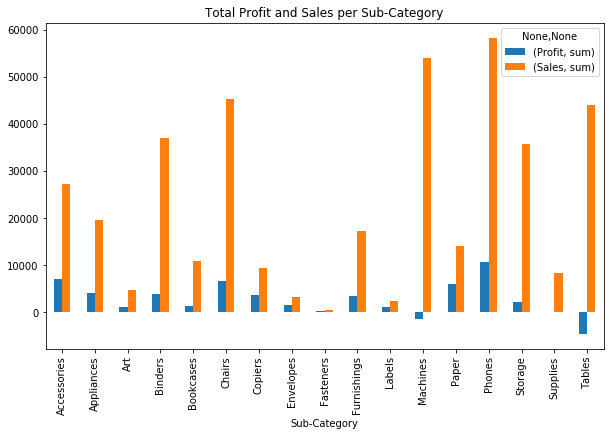

In [83]:
south.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


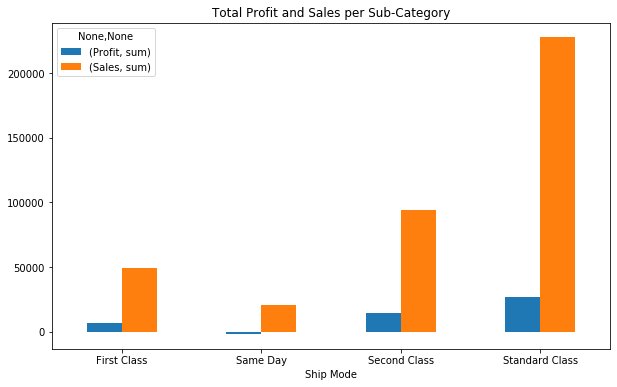

In [84]:
south.groupby('Ship Mode')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.xticks(rotation=0)
plt.show()

Unlike of all the Regions here Same Day type shipping Mode is not really going well for the company where as standard class seems to do well

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


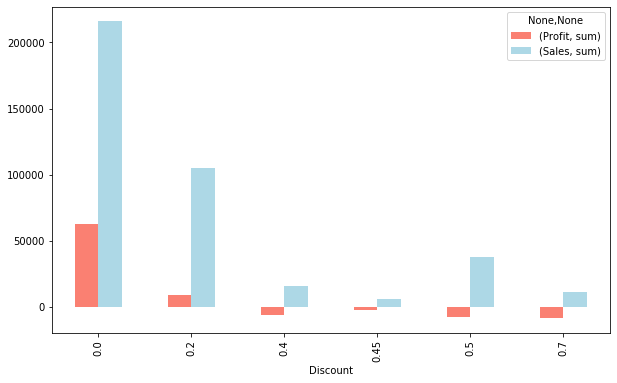

In [85]:
south.groupby('Discount')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (10,6),color=['salmon','lightblue'])
plt.show()

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


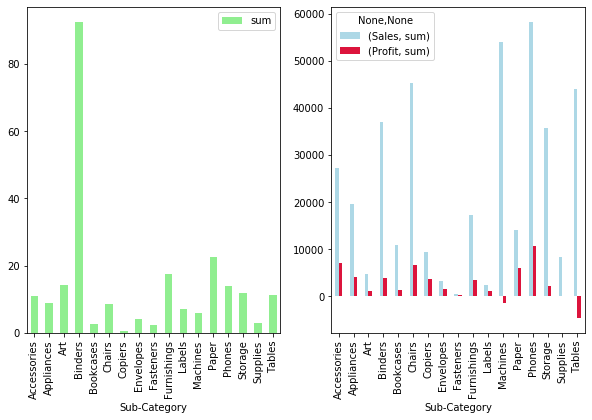

In [86]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

south.groupby('Sub-Category')['Discount'].agg(['sum']).plot.bar(figsize = (10,6),color=['lightgreen'],ax=axes[0])
south.groupby('Sub-Category')['Sales','Profit'].agg(['sum']).plot.bar(figsize = (10,6),color=['lightblue','crimson'],ax=axes[1])

Machines and Table despite being on discount cant do well where as Phones , Chairs and Paper are doing well for the company despite small discounts

In [87]:
south['City'].nunique()

125

In [88]:
south['City'].unique()

array(['Henderson', 'Fort Lauderdale', 'Concord', 'Melbourne',
       'Springfield', 'Memphis', 'Decatur', 'Durham', 'Columbia',
       'Charlotte', 'Bristol', 'Monroe', 'Franklin', 'Tampa',
       'Chapel Hill', 'Tamarac', 'Arlington', 'Saint Petersburg',
       'Murfreesboro', 'Columbus', 'Pembroke Pines', 'Miami',
       'Wilmington', 'Richmond', 'Jackson', 'Gastonia', 'Jacksonville',
       'Fayetteville', 'Atlanta', 'Lakeland', 'Montgomery',
       'Warner Robins', 'Louisville', 'Burlington', 'Waynesboro', 'Cary',
       'Palm Coast', 'Hialeah', 'Bossier City', 'Asheville', 'Florence',
       'Alexandria', 'Boca Raton', 'Virginia Beach', 'Roswell',
       'Jonesboro', 'Homestead', 'Harrisonburg', 'Coral Springs',
       'Boynton Beach', 'Gulfport', 'Greenville', 'Macon', 'Deltona',
       'Murray', 'Smyrna', 'Salem', 'Mobile', 'Thomasville', 'Lafayette',
       'Suffolk', 'Greensboro', 'Raleigh', 'Bowling Green', 'Port Orange',
       'Charlottesville', 'Apopka', 'Chesapeake', 'Jo

C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
C:\Users\Dikshitha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


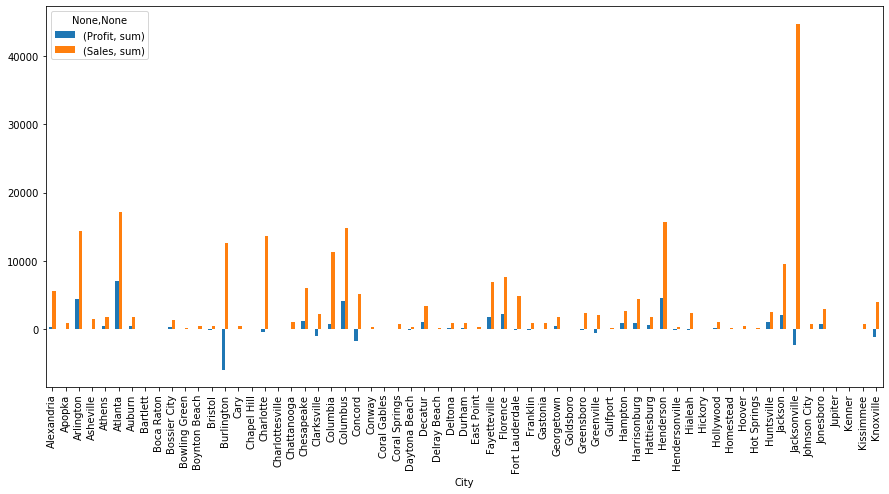

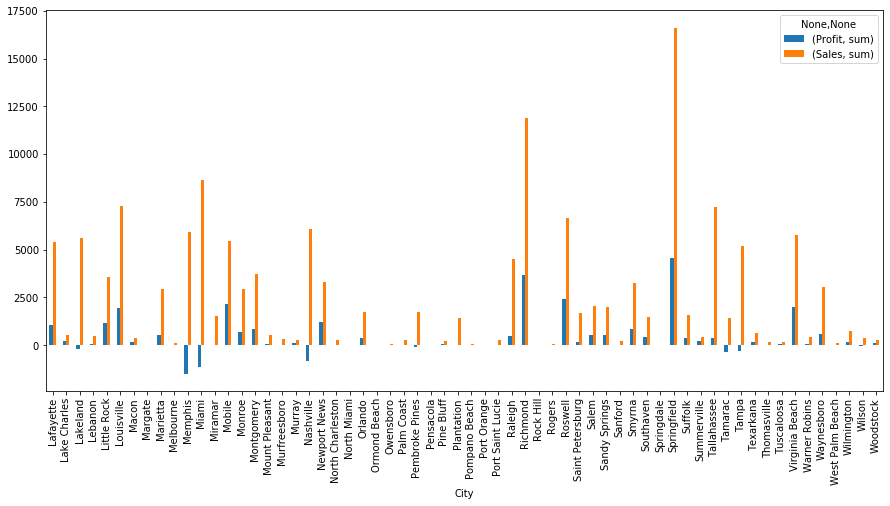

In [89]:
south.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).head(63).plot.bar(figsize=(15,7)).grid(b=False)
south.groupby('City')['Profit','Sales'].agg(['sum']).sort_values(by='City',ascending=True).tail(62).plot.bar(figsize=(15,7)).grid(b=False)
#plt.grid(b=False)

Cities Like Miami, Memphis, Nashville,Tamarac, Tampa, knoxville,Greenville, Concord, Clarksville and Burlington needs attention whereas Richmond, SpringField, Rosewell are bringing Profit to the company
Final Results to Conclude
East and West Region are doing great in the business whereas Central Region needs attention
Selling Tables and machine create a huge loss almost in all the regions where as Phones, Chairs and Binders give a huge Profit despite of small discounts
The discount amount should be taken care of as huge discounts does not seem to do well for the company
The Standard Shipping mode is best for the company profit whereas Same Day Mode needs a hike in price
The Company should stop selling the loss creating products and sell more demanded products with less profits with the less demanded products with high profit